In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# read dataframe
nb_seeds = 30
results_dir = "/storage/store2/work/aheurteb/mvicad/lbfgsb_results/results_run_many_seeds/"
save_name = f"DataFrame_with_{nb_seeds}_seeds_gen2_maxdilation115_nconcat5"
save_path = results_dir + save_name
df_res = pd.read_csv(save_path)

In [26]:
df_res

,Amari LBFGSB,Dilations score LBFGSB,Shifts score LBFGSB,Time LBFGSB,Amari MVICAD,Time MVICAD,Amari MVICAD ext,Time MVICAD ext,Amari permica,W scale,random state
0,0.012637,0.000004,1.269764e-06,51.410918,0.002774,0.374781,0.002300,0.471927,0.069613,1,0
1,0.064487,0.000003,4.071030e-07,42.418548,0.004275,0.343001,0.002243,0.430342,0.005508,1,1
2,0.011448,0.002988,3.539955e-05,45.396167,0.004855,0.358283,0.001762,0.458430,0.003357,1,2
3,0.000804,0.000007,1.772562e-06,42.320794,0.003672,0.281080,0.004537,0.349487,0.009408,1,3
4,0.037001,0.000006,3.491973e-06,43.915851,0.039533,0.274879,0.002587,0.317578,0.003691,1,4
...,...,...,...,...,...,...,...,...,...,...,...
265,0.000266,0.000004,5.116587e-07,38.835036,0.007338,0.302317,0.005169,0.358864,0.010000,9,25
266,0.013435,0.000156,5.149045e-04,22.179133,0.001644,0.284139,0.001377,0.368961,0.014084,9,26
267,0.000106,0.000005,5.279448e-07,19.002224,0.002286,0.325771,0.001916,0.427030,0.004047,9,27
268,0.016826,0.002635,5.494370e-05,39.416834,0.018868,0.259966,0.004899,0.357244,0.005519,9,28


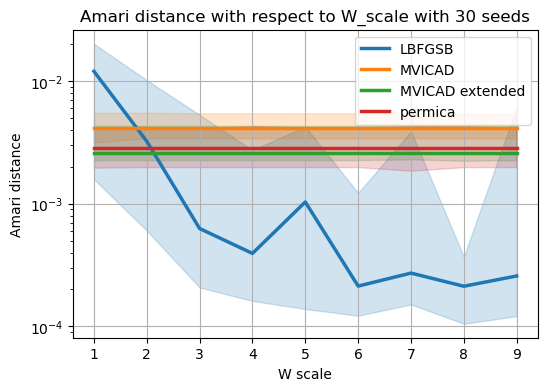

In [27]:
fig = plt.figure(figsize=(6, 4))
sns.lineplot(data=df_res, x="W scale", y="Amari LBFGSB", linewidth=2.5, label="LBFGSB", estimator=np.median)
sns.lineplot(data=df_res, x="W scale", y="Amari MVICAD", linewidth=2.5, label="MVICAD", estimator=np.median)
sns.lineplot(data=df_res, x="W scale", y="Amari MVICAD ext", linewidth=2.5, label="MVICAD extended", estimator=np.median)
sns.lineplot(data=df_res, x="W scale", y="Amari permica", linewidth=2.5, label="permica", estimator=np.median)
# plt.xticks(np.arange(np.min(W_scales), np.max(W_scales)+1))
plt.yscale("log")
plt.ylabel("Amari distance")
plt.grid()
plt.title(f"Amari distance with respect to W_scale with {nb_seeds} seeds")
plt.show()

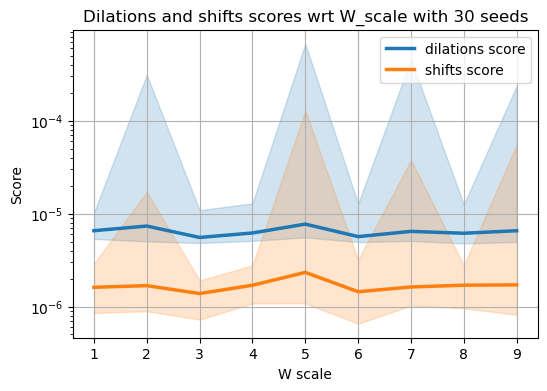

In [28]:
fig = plt.figure(figsize=(6, 4))
sns.lineplot(data=df_res, x="W scale", y="Dilations score LBFGSB", linewidth=2.5, label="dilations score", estimator=np.median)
sns.lineplot(data=df_res, x="W scale", y="Shifts score LBFGSB", linewidth=2.5, label="shifts score", estimator=np.median)
plt.yscale("log")
plt.ylabel("Score")
plt.grid()
plt.title(f"Dilations and shifts scores wrt W_scale with {nb_seeds} seeds")
plt.show()

In [21]:
# for each W_scale, compute the difference between Amari LBFGSB and one of the follwing algos: 
# MVICAD, MVICAD ext, and permica
algo = "MVICAD ext"
W_scales = np.unique(df_res["W scale"])
random_states = np.unique(df_res["random state"])
diffs = []
for i, W_scale in enumerate(W_scales):
    diff = []
    for random_state in random_states:
        df = df_res[(df_res["W scale"] == W_scale) * (df_res["random state"] == random_state)]
        diff.append(df["Amari LBFGSB"] - df[f"Amari {algo}"])
    diffs.append(np.array(diff))
diffs = np.array(diffs).reshape((len(W_scales), len(random_states)))

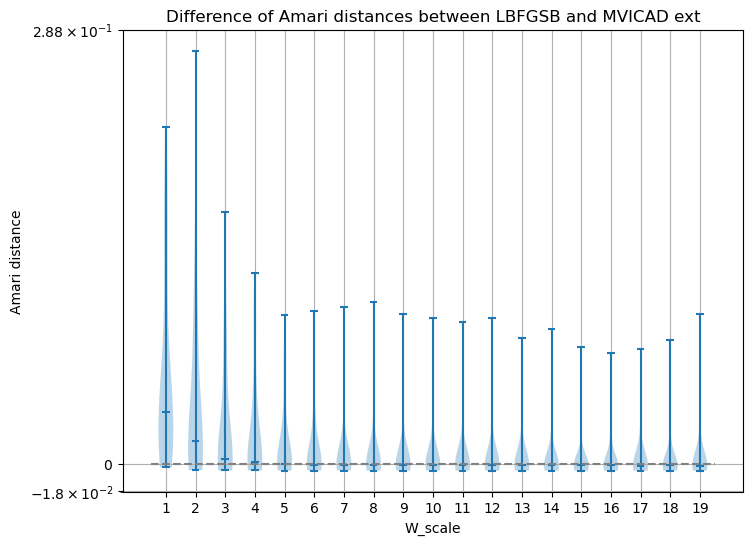

In [24]:
plt.figure(figsize=(8, 6))
plt.violinplot(diffs.T, showmedians=True)
plt.hlines(y=0, xmin=np.min(W_scales)-0.5, xmax=np.max(W_scales)+0.5, linestyles='--', colors='grey')
plt.yscale("symlog")
plt.xticks(np.arange(np.min(W_scales), np.max(W_scales)+1))
ymin, ymax = plt.ylim()
plt.yticks([np.round(ymin, 3), 0, np.round(ymax, 3)])
plt.grid()
plt.xlabel("W_scale")
plt.ylabel("Amari distance")
plt.title(f"Difference of Amari distances between LBFGSB and {algo}")
plt.show()